In [1]:
pip install pgmpy


Note: you may need to restart the kernel to use updated packages.


In [3]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

# Define the structure of the Bayesian Network with directed edges
model = BayesianNetwork([('A', 'C'), ('B', 'C')])

# Define Conditional Probability Distributions (CPDs)
cpd_a = TabularCPD(variable='A', variable_card=2, values=[[0.6], [0.4]])
cpd_b = TabularCPD(variable='B', variable_card=2, values=[[0.7], [0.3]])
cpd_c = TabularCPD(variable='C', variable_card=2, values=[[0.8, 0.2, 0.4, 0.9], [0.2, 0.8, 0.6, 0.1]],evidence=['A', 'B'], evidence_card=[2, 2])


# Associate CPDs with the model
model.add_cpds(cpd_a, cpd_b, cpd_c)

# Check model consistency
assert model.check_model()

# Perform inference
inference = VariableElimination(model)

# Query: P(C | A=1, B=0)
query_result = inference.query(variables=['C'], evidence={'A': 1, 'B': 0})
print(query_result)


+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.4000 |
+------+----------+
| C(1) |   0.6000 |
+------+----------+


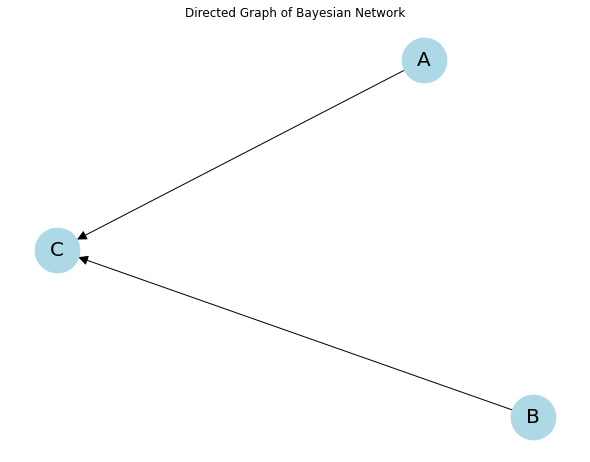

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes to the graph
G.add_nodes_from(['A', 'B', 'C'])

# Add edges to the graph
G.add_edges_from([('A', 'C'), ('B', 'C')])

# Plot the directed graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Layout for the graph
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=20, arrowsize=20)
plt.title("Directed Graph of Bayesian Network")
plt.show()


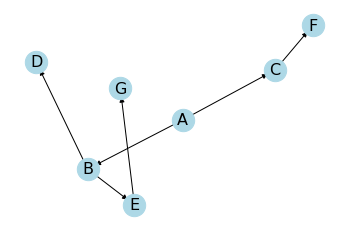

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# Sample data representing a directed graph (modify as needed)
data = {
    "A": ["B", "C"],
    "B": ["D", "E"],
    "C": ["F"],
    "D": [],
    "E": ["G"],
    "F": [],
    "G": [],
}

# Create a directed graph object
G = nx.DiGraph()

# Option 1: Using node labels as keys (recommended)
# for node, neighbors in data.items():
#     G.add_edges_from([(node, neighbor) for neighbor in neighbors])

# Option 2: Iterating through key-value pairs
for node, neighbors in data.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)  # Add edges individually

# Choose a layout algorithm (optional)
pos = nx.spring_layout(G)  # Adjust layout options as desired

# Prepare the plot
plt.axis('off')

# Draw nodes with light blue color and size
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)

# Draw edges with arrows for directionality
nx.draw_networkx_edges(G, pos, arrows=True)

# Add node labels with font size
nx.draw_networkx_labels(G, pos, font_size=16)

# Display the graph
plt.show()


Node 'B' exists in the graph.
Edge ('A', 'B') exists in the graph.
Successors of node 'A': ['B']
Predecessors of node 'D': []
No path from 'A' to 'E'.
Strongly connected components: [{'B'}, {'A'}, {'E'}, {'D'}]
Indegree of node 'D': 0
Outdegree of node 'E': 1


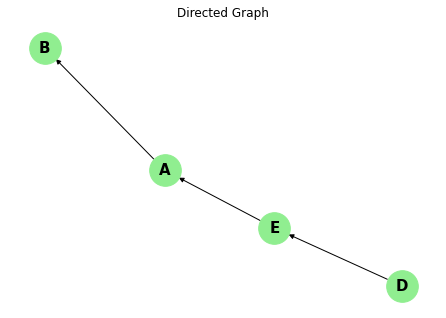

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
directed_graph = nx.DiGraph()

# Add nodes
directed_graph.add_nodes_from(['A', 'B', 'C', 'D', 'E'])

# Add directed edges
directed_graph.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E'), ('E', 'A')])

# Remove node 'C'
directed_graph.remove_node('C')

# Check if node 'B' exists
if directed_graph.has_node('B'):
    print("Node 'B' exists in the graph.")

# Check if edge ('A', 'B') exists
if directed_graph.has_edge('A', 'B'):
    print("Edge ('A', 'B') exists in the graph.")

# Access successors of node 'A'
successors_of_a = list(directed_graph.successors('A'))
print("Successors of node 'A':", successors_of_a)

# Access predecessors of node 'D'
predecessors_of_d = list(directed_graph.predecessors('D'))
print("Predecessors of node 'D':", predecessors_of_d)

# Calculate shortest path from 'A' to 'E'
try:
    shortest_path = nx.shortest_path(directed_graph, source='A', target='E')
    print("Shortest path from 'A' to 'E':", shortest_path)
except nx.NetworkXNoPath:
    print("No path from 'A' to 'E'.")

# Calculate strongly connected components
strongly_connected_components = list(nx.strongly_connected_components(directed_graph))
print("Strongly connected components:", strongly_connected_components)

# Calculate indegree of node 'D'
indegree_of_d = directed_graph.in_degree('D')
print("Indegree of node 'D':", indegree_of_d)

# Calculate outdegree of node 'E'
outdegree_of_e = directed_graph.out_degree('E')
print("Outdegree of node 'E':", outdegree_of_e)

# Visualize the directed graph
nx.draw(directed_graph, with_labels=True, node_color='lightgreen', node_size=1000, font_size=15, font_weight='bold', arrows=True)
plt.title('Directed Graph')
plt.show()
